<a href="https://colab.research.google.com/github/AbdullahFEliwa/DaimondPricePrediction/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle/

In [3]:
!cp /content/drive/MyDrive/projects/kaggle_1.json ~/.kaggle/kaggle.json

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download shivam2503/diamonds

Dataset URL: https://www.kaggle.com/datasets/shivam2503/diamonds
License(s): unknown
  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 99.1MB/s]


In [6]:
!unzip diamonds.zip

Archive:  diamonds.zip
  inflating: diamonds.csv            


**Data Exploration**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [10]:
df = df.drop(["Unnamed: 0"],axis=1)
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
#Remove Duplicate
df.drop_duplicates(inplace=True)
df.shape

(53794, 10)

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53775, 10)


**price**
price in US dollars (\$326--\$18,823)
**carat**
weight of the diamond (0.2--5.01)
**cut**
quality of the cut (Fair, Good, Very Good, Premium, Ideal)
**color**
diamond colour, from J (worst) to D (best)
**clarity**
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
**x**
length in mm (0--10.74)
**y**
width in mm (0--58.9)
**z**
depth in mm (0--31.8)
**depth**
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
**table**
width of top of diamond relative to widest point (43--95)

In [14]:
#depth =2*z/(x+y) Apply on first row in dataset

depth=2*2.43/(3.95+3.98)
depth

0.6128625472887769

In [15]:
df = df.drop(['x','y','z'],axis=1)
df.head(3)

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327


In [16]:
df.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64


In [17]:
df["price"]=df["price"].astype(float)
df.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,float64


**DataVisualization and Outlier handle **

Text(0.5, 1.0, 'Distrbution of the carat')

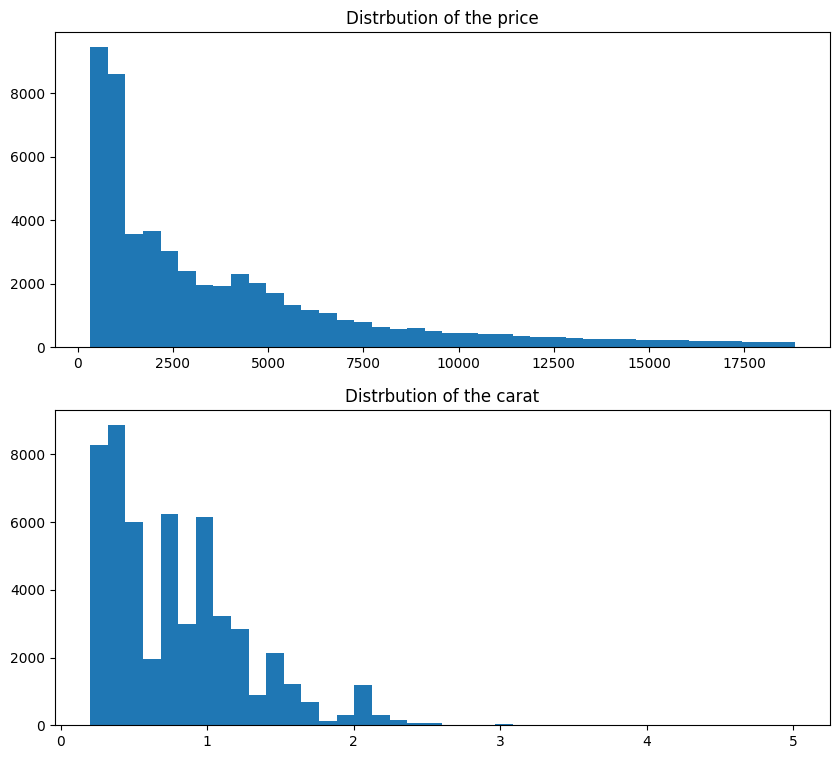

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(10, 9))

# Plot first histogram in the first subplot
axs[0].hist(df["price"],bins=40)
axs[0].set_title('Distrbution of the price')

# Plot second histogram in the second subplot
axs[1].hist(df["carat"], bins=40)
axs[1].set_title('Distrbution of the carat')


In [19]:
df["price"].skew()

1.6182203665466373

In [20]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feature)

['carat', 'depth', 'table', 'price']


In [21]:
def outlier_handle(data, col_list):
    df_new = data.copy()
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_new.loc[:,  col_name] = np.where(data[col_name]> fence_high, fence_high,
                                            np.where(data[col_name]< fence_low,fence_low,data[col_name])
                                           )
    return df_new

In [22]:
df=outlier_handle(df,num_feature)

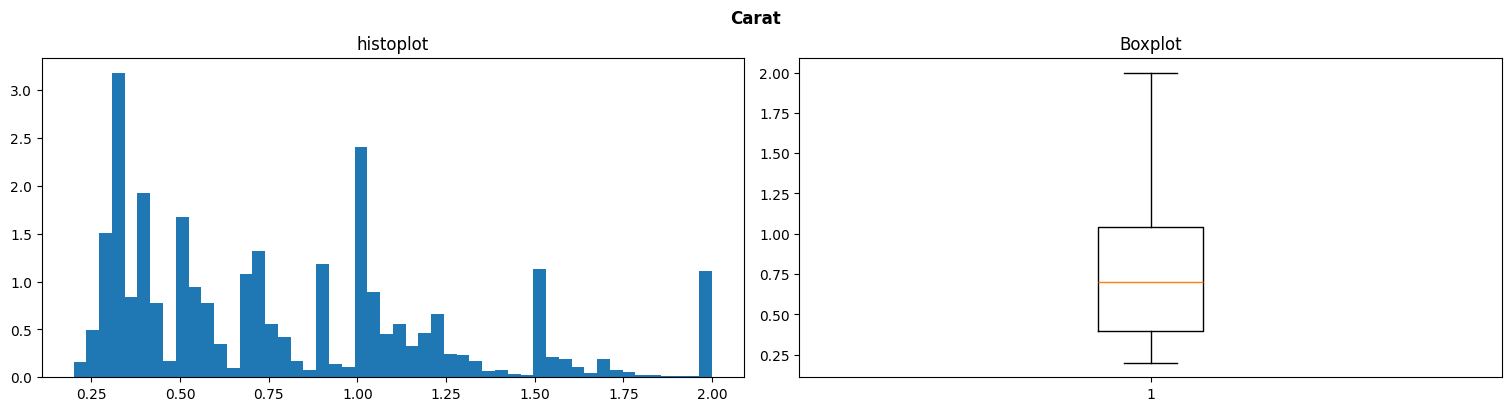

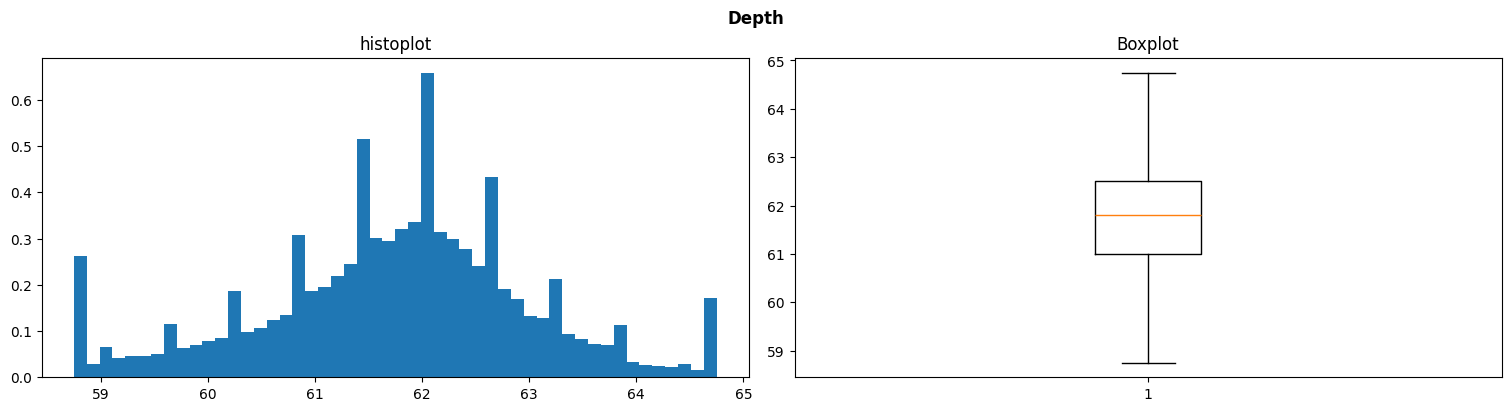

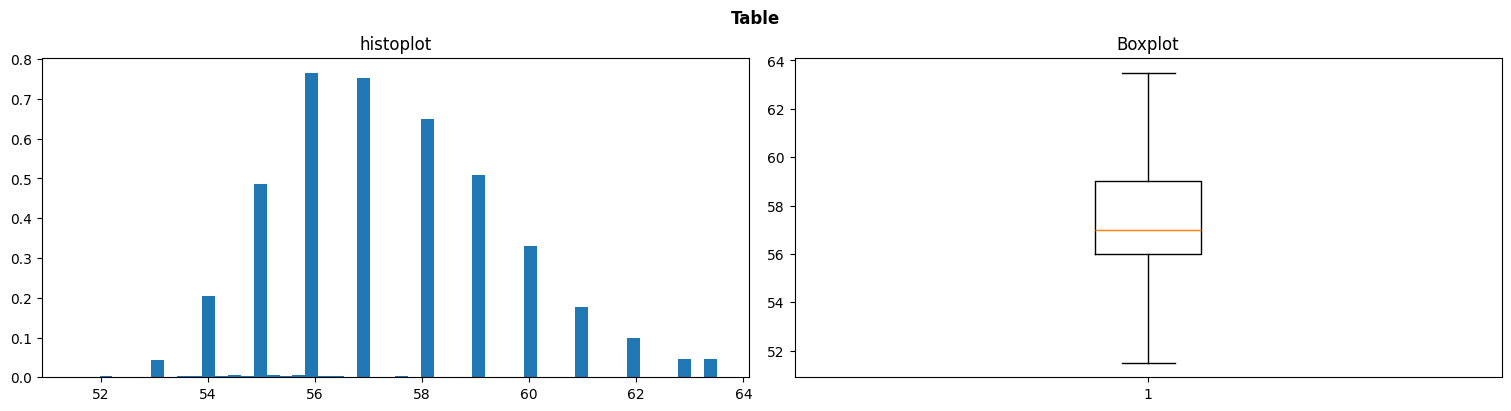

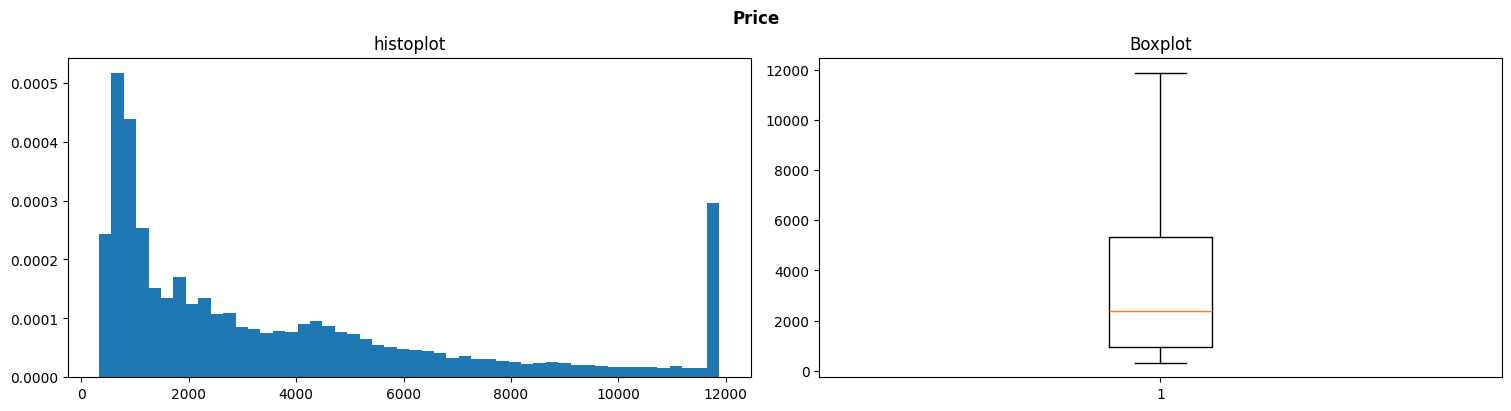

In [23]:
for col in num_feature:
    fig,ax=plt.subplots(1, 2, constrained_layout=True)
    fig.set_size_inches(15, 4)
    ax[0].hist(df[col], bins=50, density=True)
    ax[0].set_title('histoplot')

    ax[1].boxplot(df[col],vert=0)
    ax[1].set_title('Boxplot')

    #sns.distplot(df[col], ax=ax[0],color='blue').set(title="Distplot")
    #sns.boxplot(df[col], ax=ax[1],color='blue').set(title="Boxplot")
    plt.suptitle(f'{col.title()}',weight='bold')
    plt.show()

In [24]:
df["price"].skew()

1.1482766900646497

In [25]:
import plotly.express as px
fig = px.scatter_3d(df, x='table', y='carat', z='price',color='clarity')
fig.show()

In [26]:
import plotly.express as px
fig = px.scatter_3d(df, x='depth', y='carat', z='price',color='color')
fig.show()

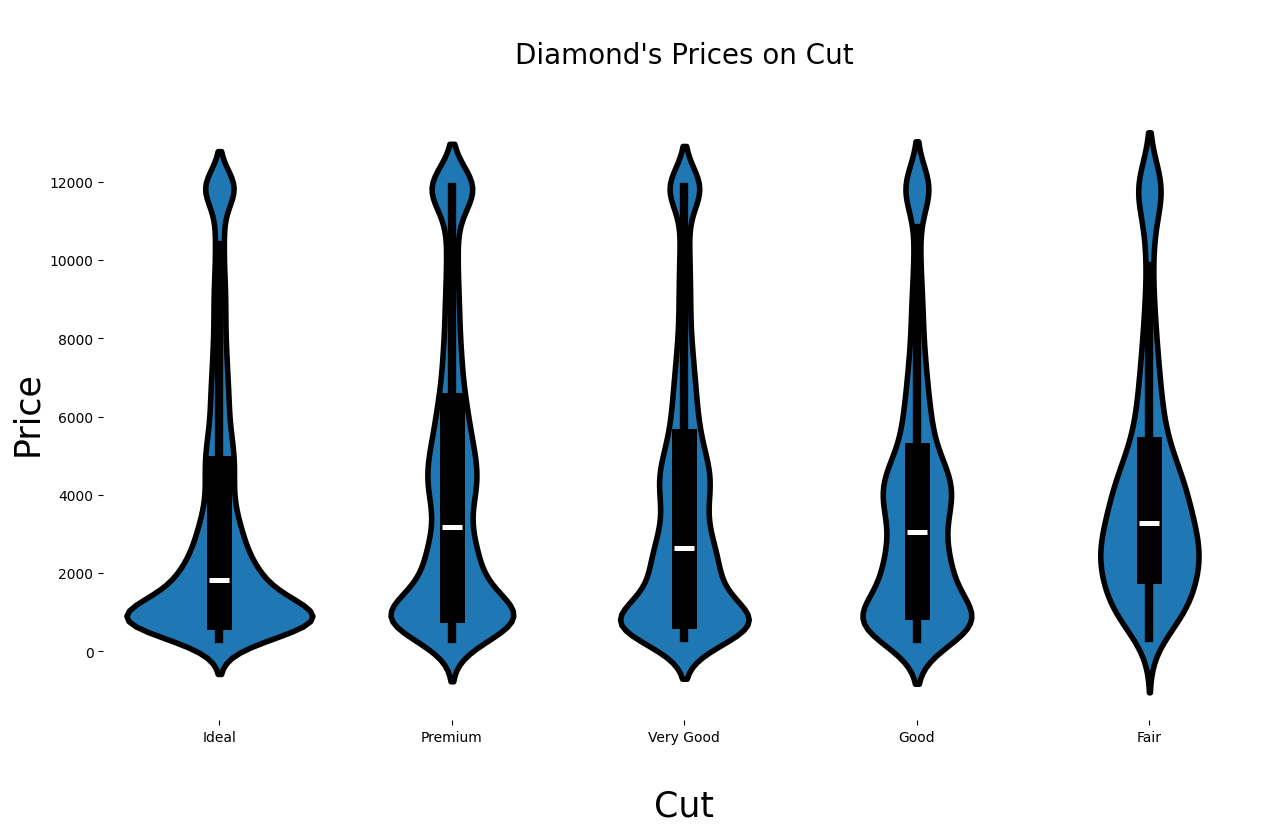

In [27]:
plt.subplots(figsize = (15, 8))
p = sns.violinplot(x = df["cut"],
                  y = df["price"],
                  order = df["cut"].value_counts().index,
                  saturation = 1,
                  linewidth = 4,
                  edgecolor = "black")

p.axes.set_title("\nDiamond's Prices on Cut\n", fontsize = 20)
p.axes.set_xlabel("\nCut", fontsize = 25)
p.axes.set_ylabel("Price", fontsize = 25)
sns.despine(left = True, bottom = True)
plt.show()

<Axes: xlabel='count', ylabel='cut'>

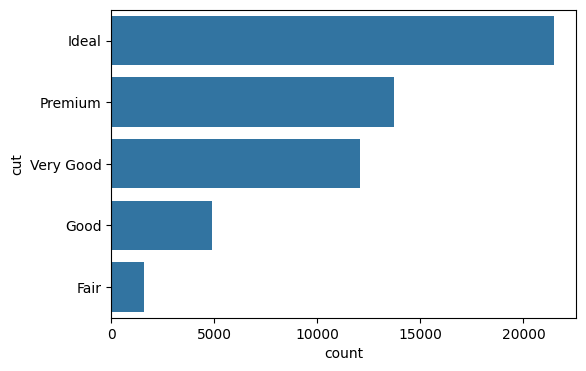

In [28]:
plt.figure(figsize = (6, 4))

sns.countplot(y=df["cut"], order=df.cut.value_counts().index)

**Mapping For categrical parameter **

In [29]:
#J (worst) to D (best)
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [30]:
df['color']=df.color.map({'J':1, 'I':2,  'H':3, 'G':4, 'F':5, 'E':6, 'D':7 })
df.head(2)

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,6,SI2,61.5,55.0,326.0
1,0.21,Premium,6,SI1,59.8,61.0,326.0


In [31]:

df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [32]:
df['cut']=df.cut.map({'Fair':1, 'Good':2,  'Very Good':3, 'Premium':4, 'Ideal':5 })
df.head(2)

,carat,cut,color,clarity,depth,table,price
0,0.23,5,6,SI2,61.5,55.0,326.0
1,0.21,4,6,SI1,59.8,61.0,326.0


In [33]:
#(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [34]:
df['clarity']=df.clarity.map({'I1':1, 'SI2':2,  'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7 , 'IF':8})
df.head(2)

,carat,cut,color,clarity,depth,table,price
0,0.23,5,6,2,61.5,55.0,326.0
1,0.21,4,6,3,59.8,61.0,326.0


In [35]:
X= df.drop(["price"],axis =1)
y= df["price"]
X

,carat,cut,color,clarity,depth,table
0,0.23,5,6,2,61.50,55.0
1,0.21,4,6,3,59.80,61.0
2,0.23,2,6,5,58.75,63.5
3,0.29,4,2,4,62.40,58.0
4,0.31,2,1,2,63.30,58.0
...,...,...,...,...,...,...
53935,0.72,5,7,3,60.80,57.0
53936,0.72,2,7,3,63.10,55.0
53937,0.70,3,7,3,62.80,60.0
53938,0.86,4,3,2,61.00,58.0


**Split data **

In [36]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [38]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(40331, 6)
(13444, 6)
(40331,)
(13444,)


**Bulid model**

In [39]:
from sklearn.linear_model import LinearRegression
Reg =LinearRegression()
Reg.fit(x_train_scaled,y_train)


LinearRegression()

In [40]:
y_pred=Reg.predict(x_test_scaled)

In [41]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print("After Performing Linear Regression,\n")
print(f"R Squared Value: {metrics.r2_score(y_test, y_pred)}")

print(f"Adjusted R Squared Value: {1-(1-metrics.r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)}")


print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}")

After Performing Linear Regression,

R Squared Value: 0.9285937955514587
Adjusted R Squared Value: 0.9285619106644534
Mean Absolute Error: 670.5692694322344
Mean Squared Error: 828637.8280002598
Root Mean Squared Error: 828637.8280002598


In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold # Import KFold from sklearn.model_selection

k = 10

skf = KFold(n_splits=k, shuffle=True, random_state=42)

data_splits_object=skf.split(X, y)

#Run the following 3 lines together multiple times to see how different data gets presented
my_split_data=next(data_splits_object)
print("Train indices are: ", my_split_data[0][0:10])
print("Test indices are: ", my_split_data[1][0:10]) #Print first 10 values

# empty lists to store predicted and ground truth values from all folds
predicted_y = []
expected_y = []


scaler = MinMaxScaler()

# Fit and predict iteratively on all splits
for train_index, test_index in skf.split(X, y):

    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale inputs
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    model = LinearRegression()
    model.fit(x_train, y_train)

    # print accuracy for each fold
    predicted_this_fold = model.predict(x_test)
    mse = mean_squared_error(y_test, predicted_this_fold)
    print("MSE from this fold is: " + str(mse))

    # store the prediction in a list
    predicted_y.extend(predicted_this_fold)

    # store the ground truth for this specific fold
    expected_y.extend(y_test)

# print accuracy
mse = mean_squared_error(expected_y, predicted_y)
print('\n', "MSE from all folds is: " + str(mse))

Train indices are:  [ 0  1  2  3  5  7  8  9 10 11]
Test indices are:  [  4   6  40  41  80 103 110 114 128 147]
MSE from this fold is: 812453.6427619065
MSE from this fold is: 822346.4171012287
MSE from this fold is: 831452.249463503
MSE from this fold is: 797938.3085776356
MSE from this fold is: 847936.1374372598
MSE from this fold is: 827009.9892167164
MSE from this fold is: 780458.6016223617
MSE from this fold is: 856933.41588764
MSE from this fold is: 801789.4088428303
MSE from this fold is: 843643.411014783

 MSE from all folds is: 822196.1795029421
